In [128]:
import numpy as np
import pandas as pd
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

<hr>

Descripcion de los features

<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

In [42]:
df_train = pd.read_csv('../titanic/train.csv')
df_test = pd.read_csv('../titanic/test.csv')

In [44]:
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
#tomo sólo los registros para los que todos los campos están completos, salvo paraa Cabin
df_model = df_train.loc[:, df_train.columns != 'Cabin'].dropna(axis=0)

In [53]:
df_model['Survived'].value_counts(normalize=True)

0    0.595506
1    0.404494
Name: Survived, dtype: float64

In [80]:
X = df_model[['Pclass', 'Sex', 'Age']]
categorical_features = ['Pclass', 'Sex']
for feature in categorical_features:
    dummies = pd.get_dummies(df_model[feature], prefix=feature, drop_first=True)
    X[dummies.columns] = dummies
    X.drop(columns=[feature], inplace=True)

C:\Users\joaqu\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joaqu\Anaconda3\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
X = df_model[['Pclass', 'Sex', 'Age']]
sex_dummies = pd.get_dummies(X['Sex'], prefix='sex')
X[sex_dummies.columns] = sex_dummies
X.drop(columns=['Sex'], inplace=True)

y = df_model['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=12)

C:\Users\joaqu\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\joaqu\Anaconda3\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
kf = KFold(n_splits=5, shuffle=True, random_state=12)
scores_para_df_standar = []

for i in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    dict_row_score = {'score_medio':np.mean(cv_scores),\
                      'score_std':np.std(cv_scores),'n_neighbours':i}
    scores_para_df_standar.append(dict_row_score)

In [96]:
df_scores = pd.DataFrame(scores_para_df_standar)
df_scores['cota_inferior'] = df_scores['score_medio'] - df_scores['score_std']
df_scores['cota_superior'] = df_scores['score_medio'] + df_scores['score_std']

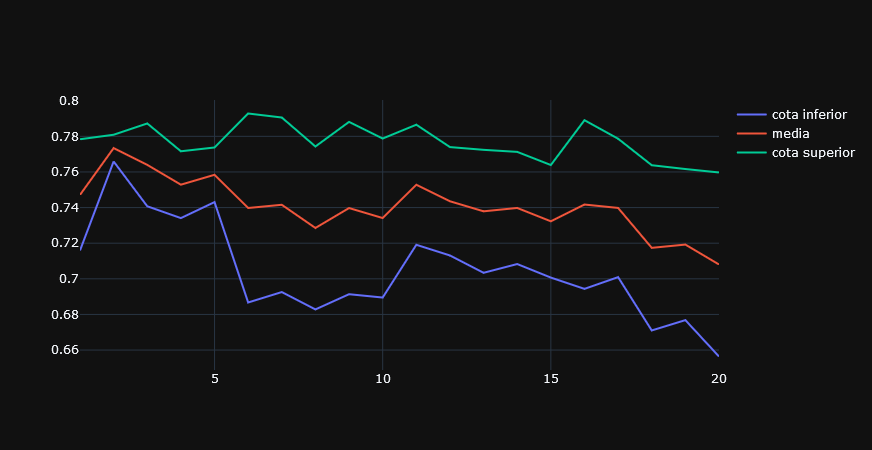

In [102]:
data_cota_inferior = go.Scatter(
    x=df_scores['n_neighbours'],
    y=df_scores['cota_inferior'],
    name='cota inferior'
)
data_media = go.Scatter(
    x=df_scores['n_neighbours'],
    y=df_scores['score_medio'],
    name='media'
)
data_cota_superior = go.Scatter(
    x=df_scores['n_neighbours'],
    y=df_scores['cota_superior'],
    name='cota superior'
)
layout = go.Layout(
    template='plotly_dark'
)
fig = go.Figure(data=[data_cota_inferior, data_media, data_cota_superior], layout=layout)
py.offline.iplot(fig)

In [116]:
best_k = df_scores[df_scores.score_medio == df_scores.score_medio.max()].n_neighbours.values[0]

In [117]:
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [119]:
y_pred = model.predict(X_test)

In [123]:
confusion_matrix(y_test, y_pred)

array([[99,  7],
       [30, 42]], dtype=int64)

In [124]:
accuracy_score(y_test, y_pred)

0.7921348314606742

In [129]:
recall_score(y_test, y_pred)

0.5833333333333334

In [141]:
from sklearn.metrics import roc_curve

In [139]:
y_scores = model.predict_proba(X_test)

In [142]:
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])

array([0.        , 0.33333333, 0.66666667, 1.        ])

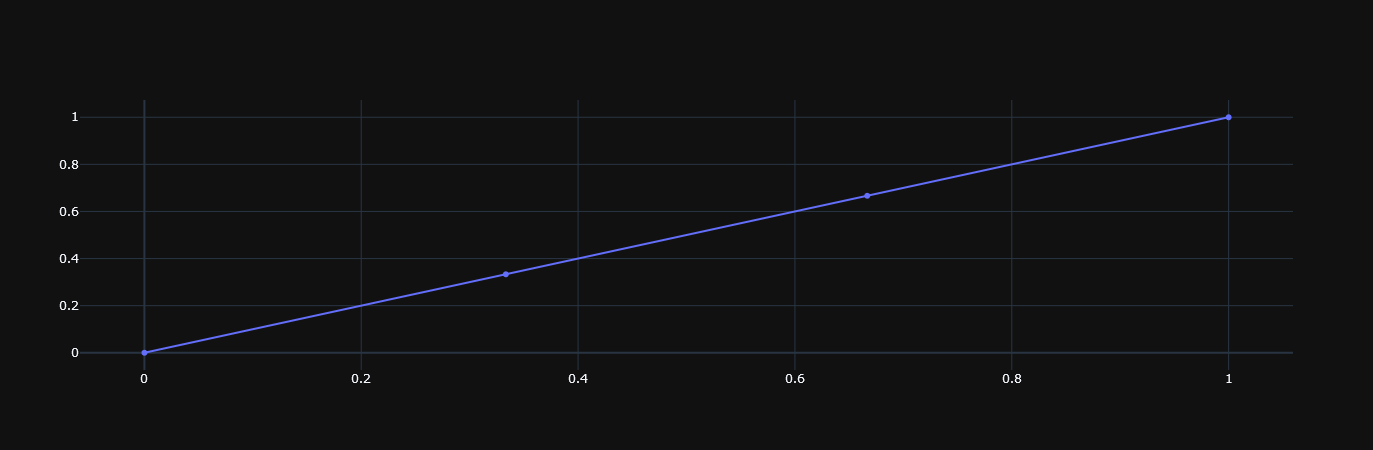

In [148]:
null_model_values = np.linspace(0,1,4)
null_model = go.Scatter(x=null_model_values, y=null_model_values, name='null model')
layout = go.Layout(template='plotly_dark')
fig = go.Figure(data=null_model, layout=layout)
py.offline.iplot(fig)

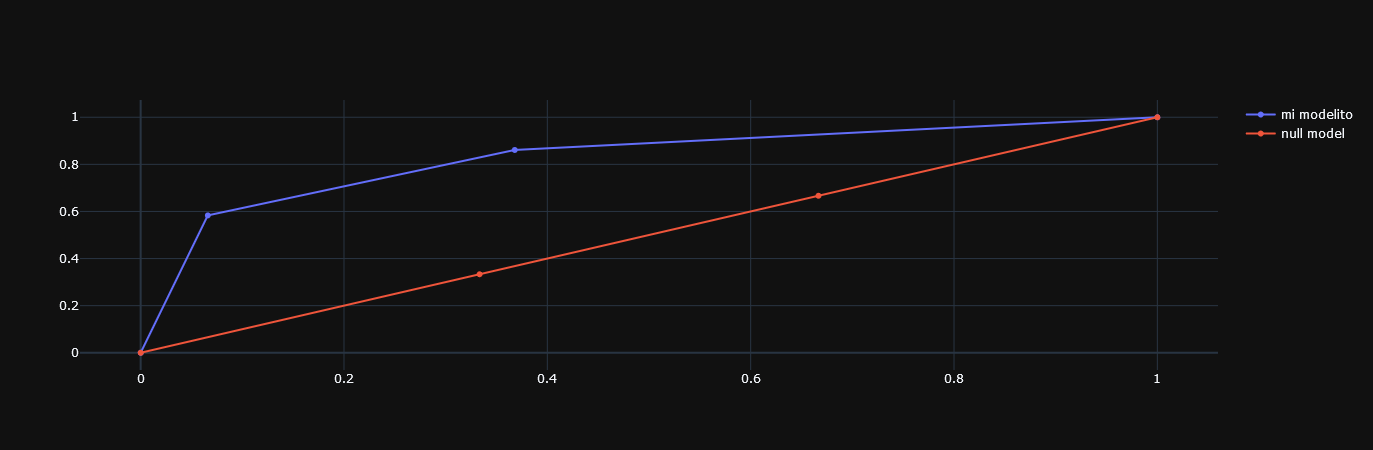

In [153]:
roc_curv = go.Scatter(x=fpr, y=tpr, name='mi modelito')
null_model_values = np.linspace(0,1,4)
null_model = go.Scatter(x=null_model_values, y=null_model_values, name='null model')
layout = go.Layout(template='plotly_dark')
fig = go.Figure(data=[roc_curv, null_model], layout=layout)
py.offline.iplot(fig)